In [1]:
## Library Imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn as imbl

## Custom libraries
import index_helpers as ih
import data_transformations as dtrans

### Import Data

Examining the fine segmentation

In [2]:
df = ih.read_and_merge_segmented_data()
df = ih.index_df_by_person(df)

In [6]:
df.describe()

,Label,EEPD50_100,EEPD100_150,EEPD150_200,EEPD200_250,EEPD250_300,EEPD300_350,EEPD350_400,EEPD400_450,EEPD450_500,...,MFCC_std11,MFCC_std12,Crest_Factor,Cough_Length,PSD_225-425,PSD_450-550,PSD_1325-1600,PSD_1600-1900,PSD_2500-2900,PSD_3100-3700
count,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,...,7009.000000,7009.000000,7009.000000,7009.000000,7.009000e+03,7.009000e+03,7009.000000,7009.000000,7.009000e+03,7.009000e+03
mean,0.271223,4.351833,4.360964,4.412470,4.473962,4.503781,4.521758,4.554002,4.593523,4.609645,...,9.742281,10.997064,6.211998,0.671730,2.294744e-01,9.386090e-02,0.060585,0.048999,2.073963e-02,2.870803e-02
std,0.444622,1.278799,1.268739,1.276464,1.279308,1.303323,1.288280,1.326851,1.343370,1.341938,...,3.552492,3.643627,2.016748,0.149396,1.638755e-01,9.938841e-02,0.075247,0.065329,3.192758e-02,4.276823e-02
min,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.872166,2.568807,1.914327,0.500083,6.137005e-07,7.349431e-07,0.000001,0.000006,7.740565e-08,4.191298e-07
25%,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,7.182455,8.459599,4.809888,0.565250,1.042027e-01,2.945662e-02,0.014710,0.010312,3.621972e-03,4.751279e-03
50%,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,9.232484,10.668886,5.848766,0.639000,1.965166e-01,6.173333e-02,0.035651,0.026557,9.871327e-03,1.382644e-02
75%,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,11.760843,13.216452,7.232188,0.737917,3.172204e-01,1.223411e-01,0.076502,0.062026,2.429375e-02,3.488572e-02
max,1.000000,17.000000,16.000000,16.000000,19.000000,20.000000,18.000000,18.000000,23.000000,21.000000,...,28.938110,34.498024,16.983607,2.665167,1.012291e+00,9.351590e-01,0.802540,0.961117,3.635824e-01,6.842158e-01


In [7]:
df.isnull().values.any()

False

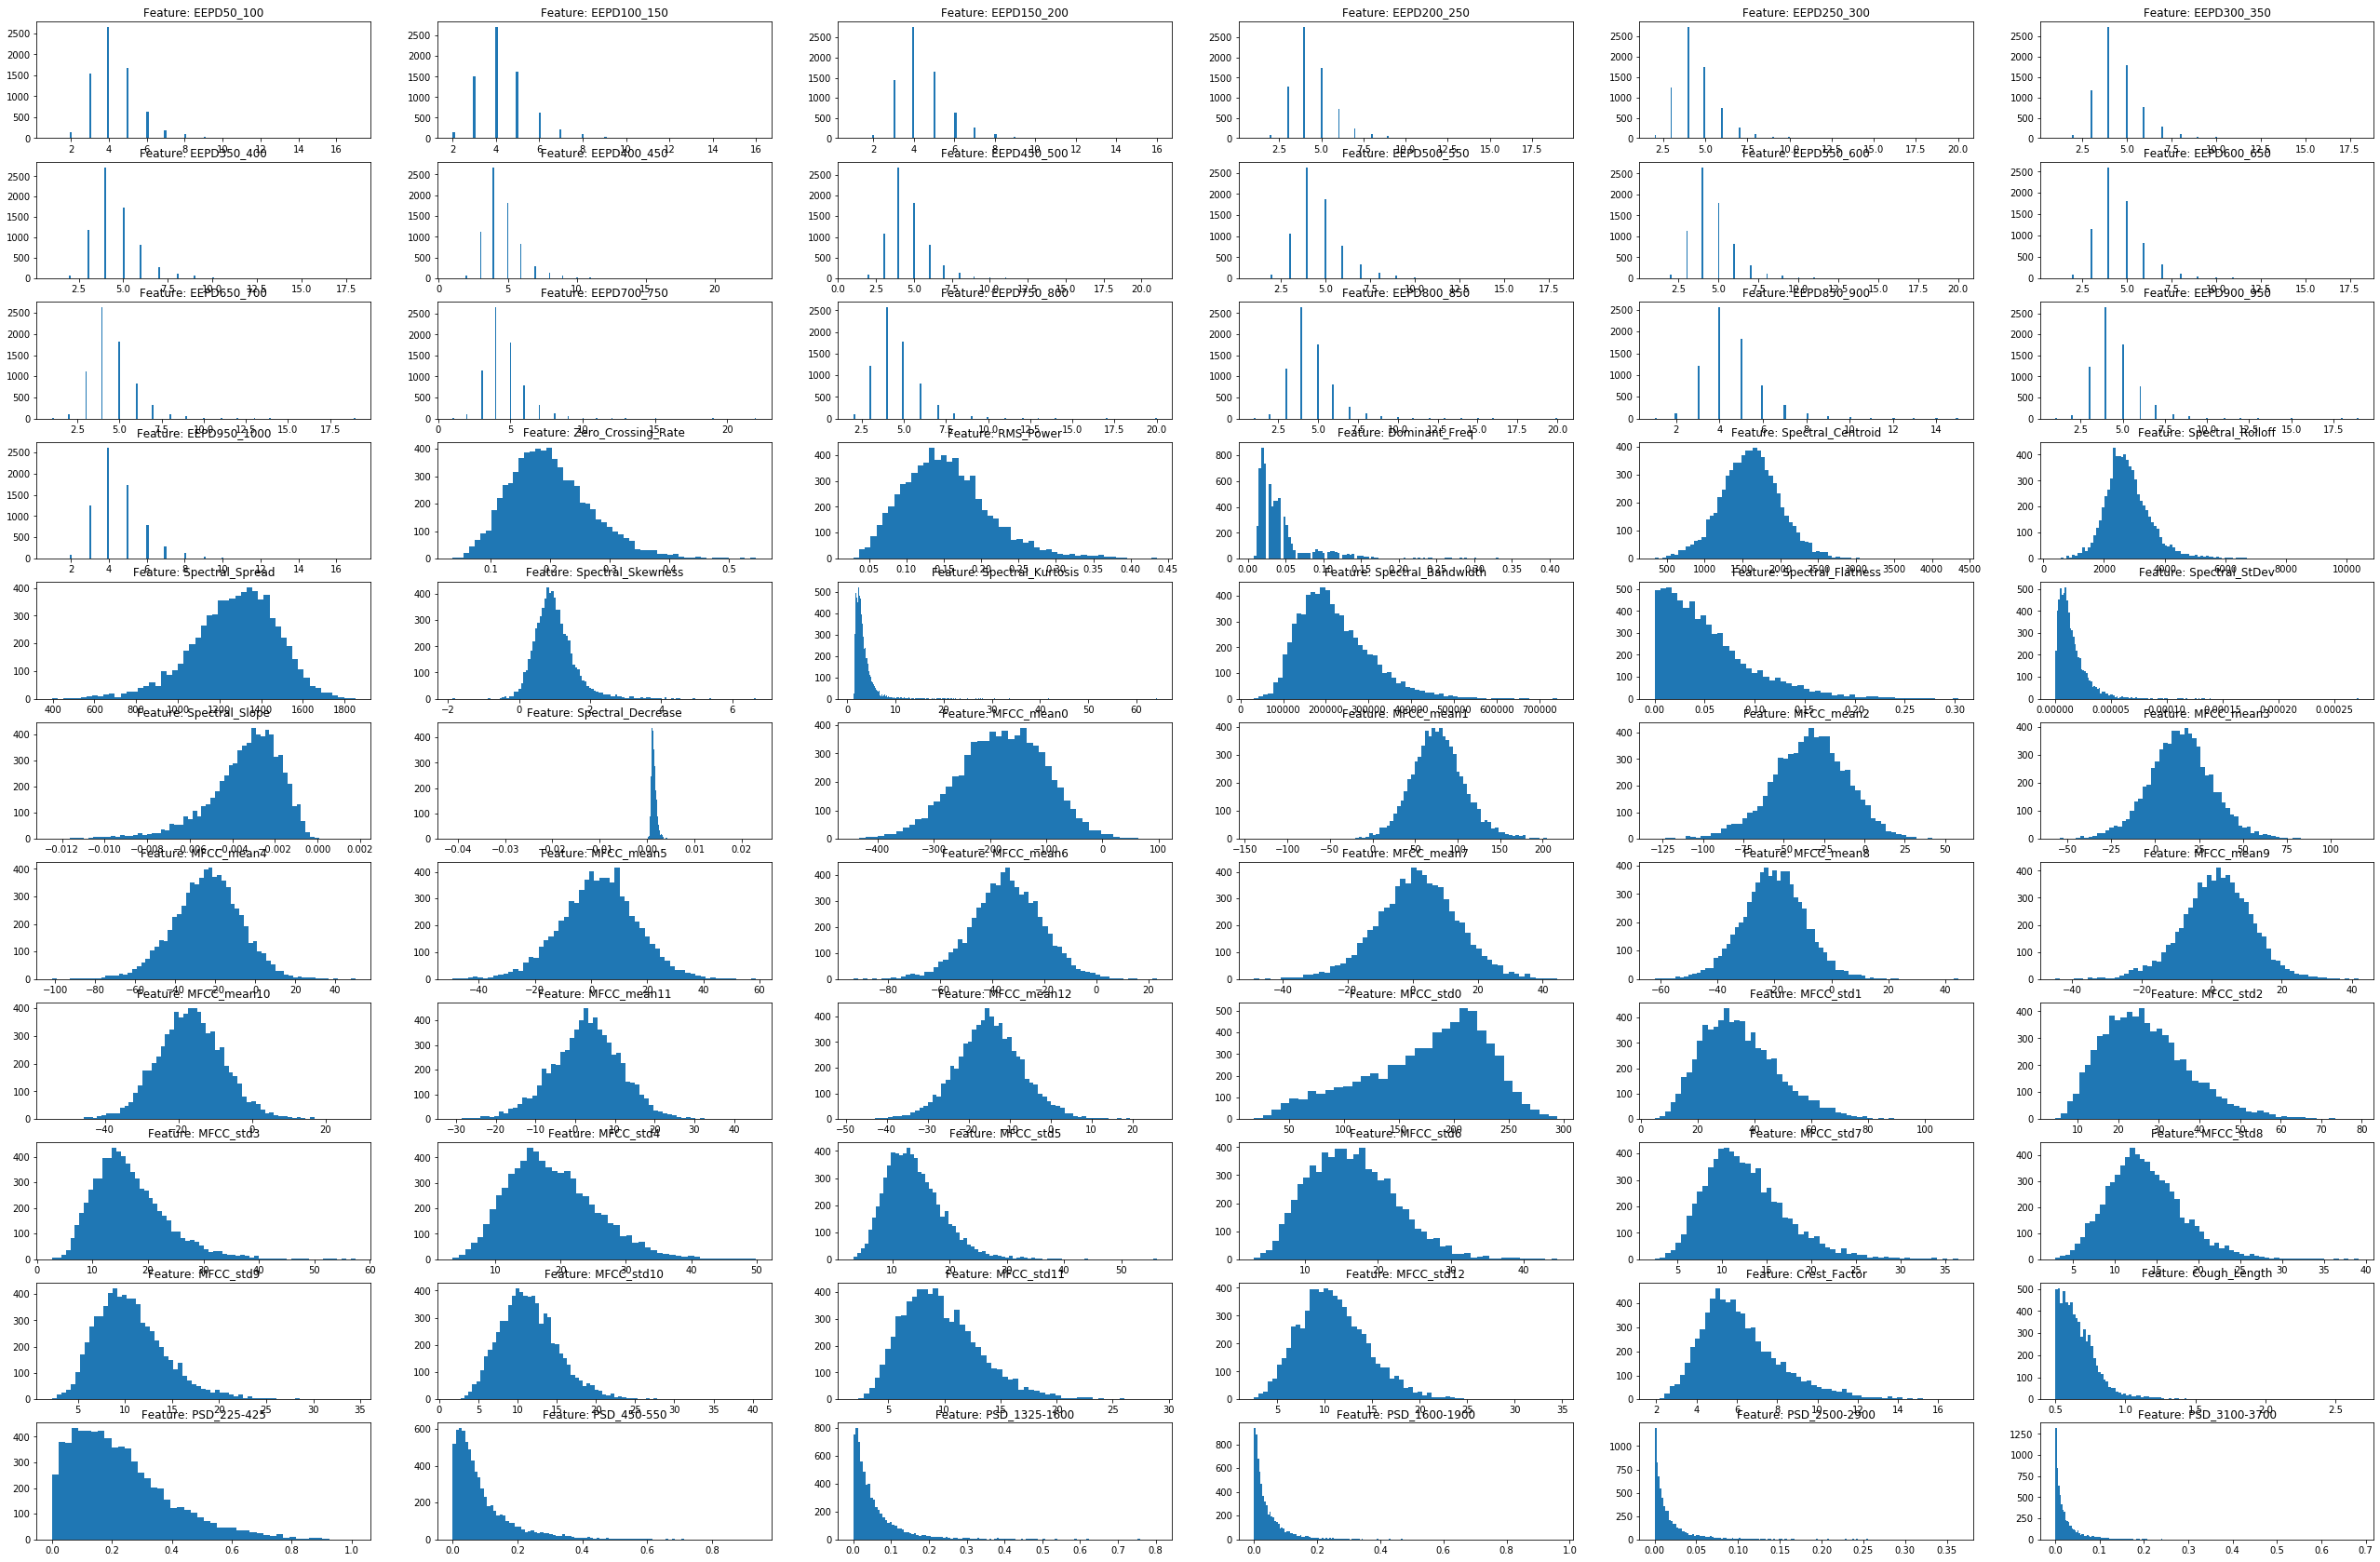

In [5]:
# Histogram tX
nrows = 11
ncols = 6
fig, axes = plt.subplots(nrows, ncols)

feature_names = df.drop("Label", axis=1).columns
feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp = df[feature_names[feature_id]]
        axes[row, col].hist(feature_tbp, bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_names[feature_id]))
        feature_id += 1

fig.set_size_inches(45, 30)

- Some skewed datasets. 
- Feature: Dominant_Freq seems to have missing or filtered values... 
- The x-scaling on some of these distributions are weird, which might indicate presence of outliers. Should be checked against the description of the dataframe
- Feature: Spectral Bandwidth has values up to 7 million

### Power Transform skewed features

In [8]:
skewed = df.skew()
skewed_features = skewed[(skewed > 2 ) | (skewed < -2)]
skewed_features

Dominant_Freq         3.128527
Spectral_Kurtosis     6.508859
Spectral_StDev        3.199250
Spectral_Decrease   -16.771009
Cough_Length          2.251654
PSD_450-550           2.354811
PSD_1325-1600         3.073834
PSD_1600-1900         3.533065
PSD_2500-2900         3.896545
PSD_3100-3700         4.045204
dtype: float64

In [11]:
df, pt = dtrans.power_transform_skewed_features(df)

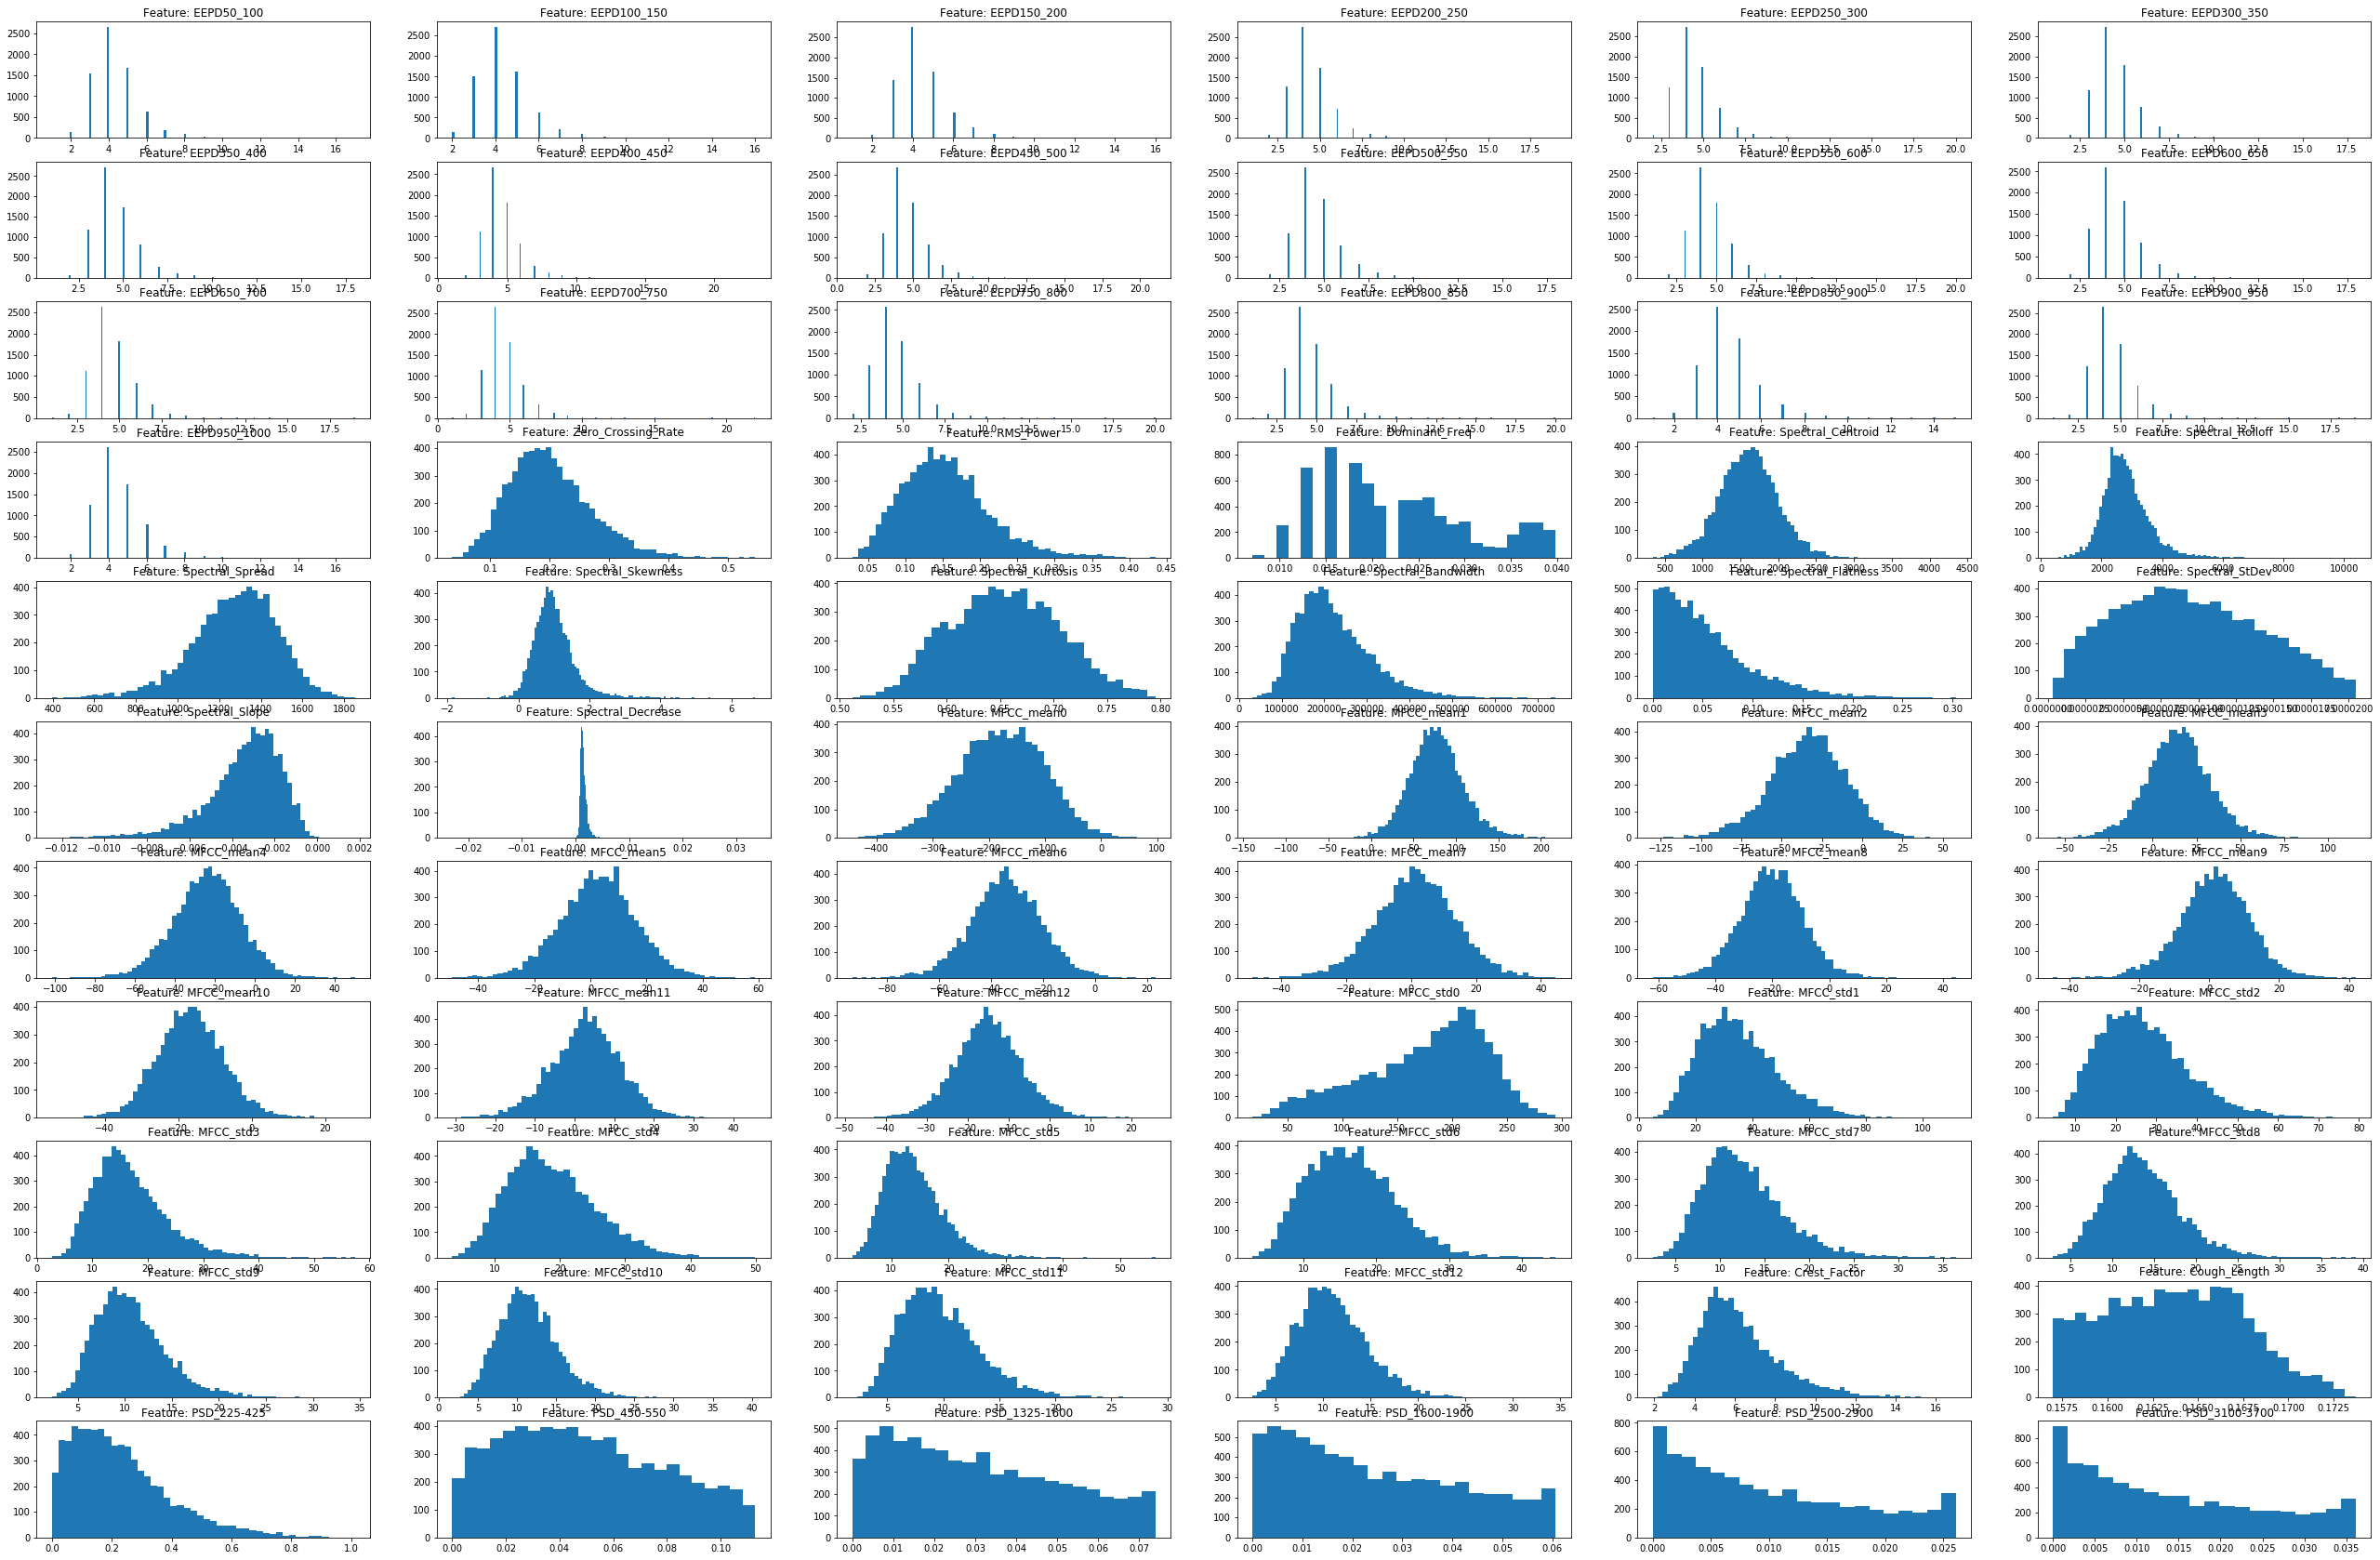

In [18]:
# Histogram tX
nrows = 11
ncols = 6
fig, axes = plt.subplots(nrows, ncols)

feature_names = df.drop("Label", axis=1).columns
feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp = df[feature_names[feature_id]]
        axes[row, col].hist(feature_tbp, bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_names[feature_id]))
        feature_id += 1

fig.set_size_inches(45, 30)

### Normalize Data

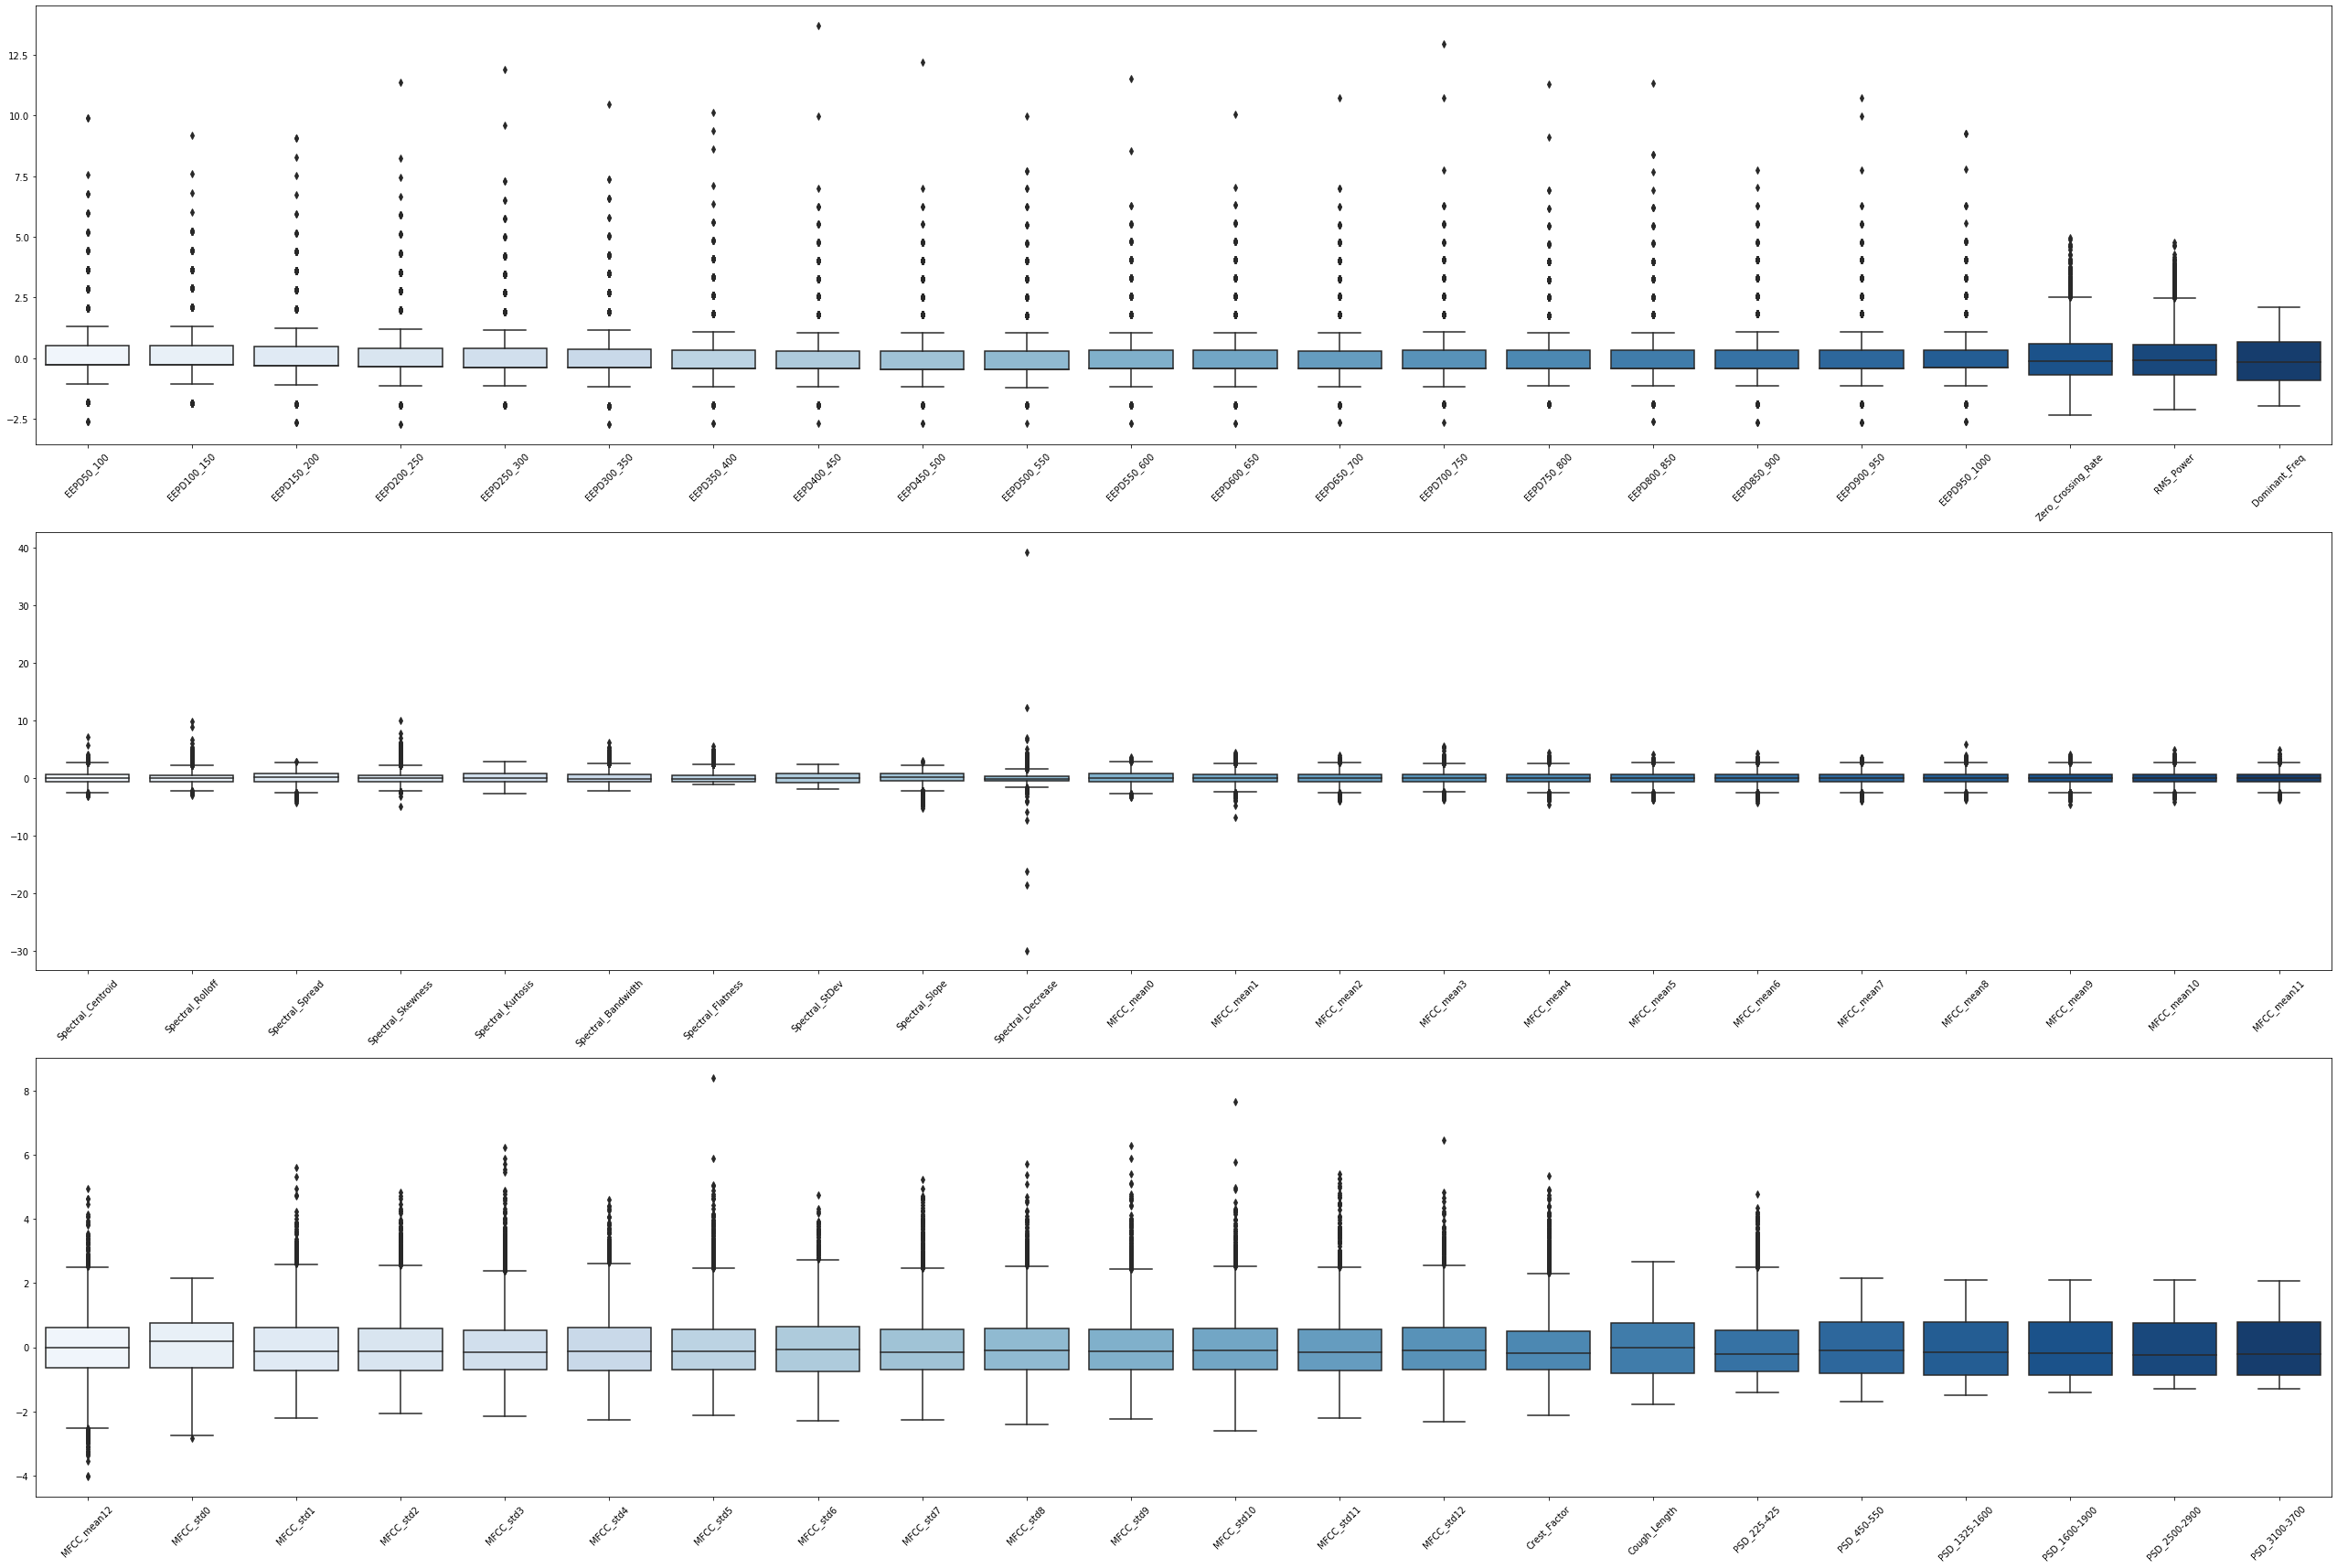

In [12]:
df = dtrans.scenter_scale_features(df)

from plot_functions import boxplot_features
boxplot_features(df)

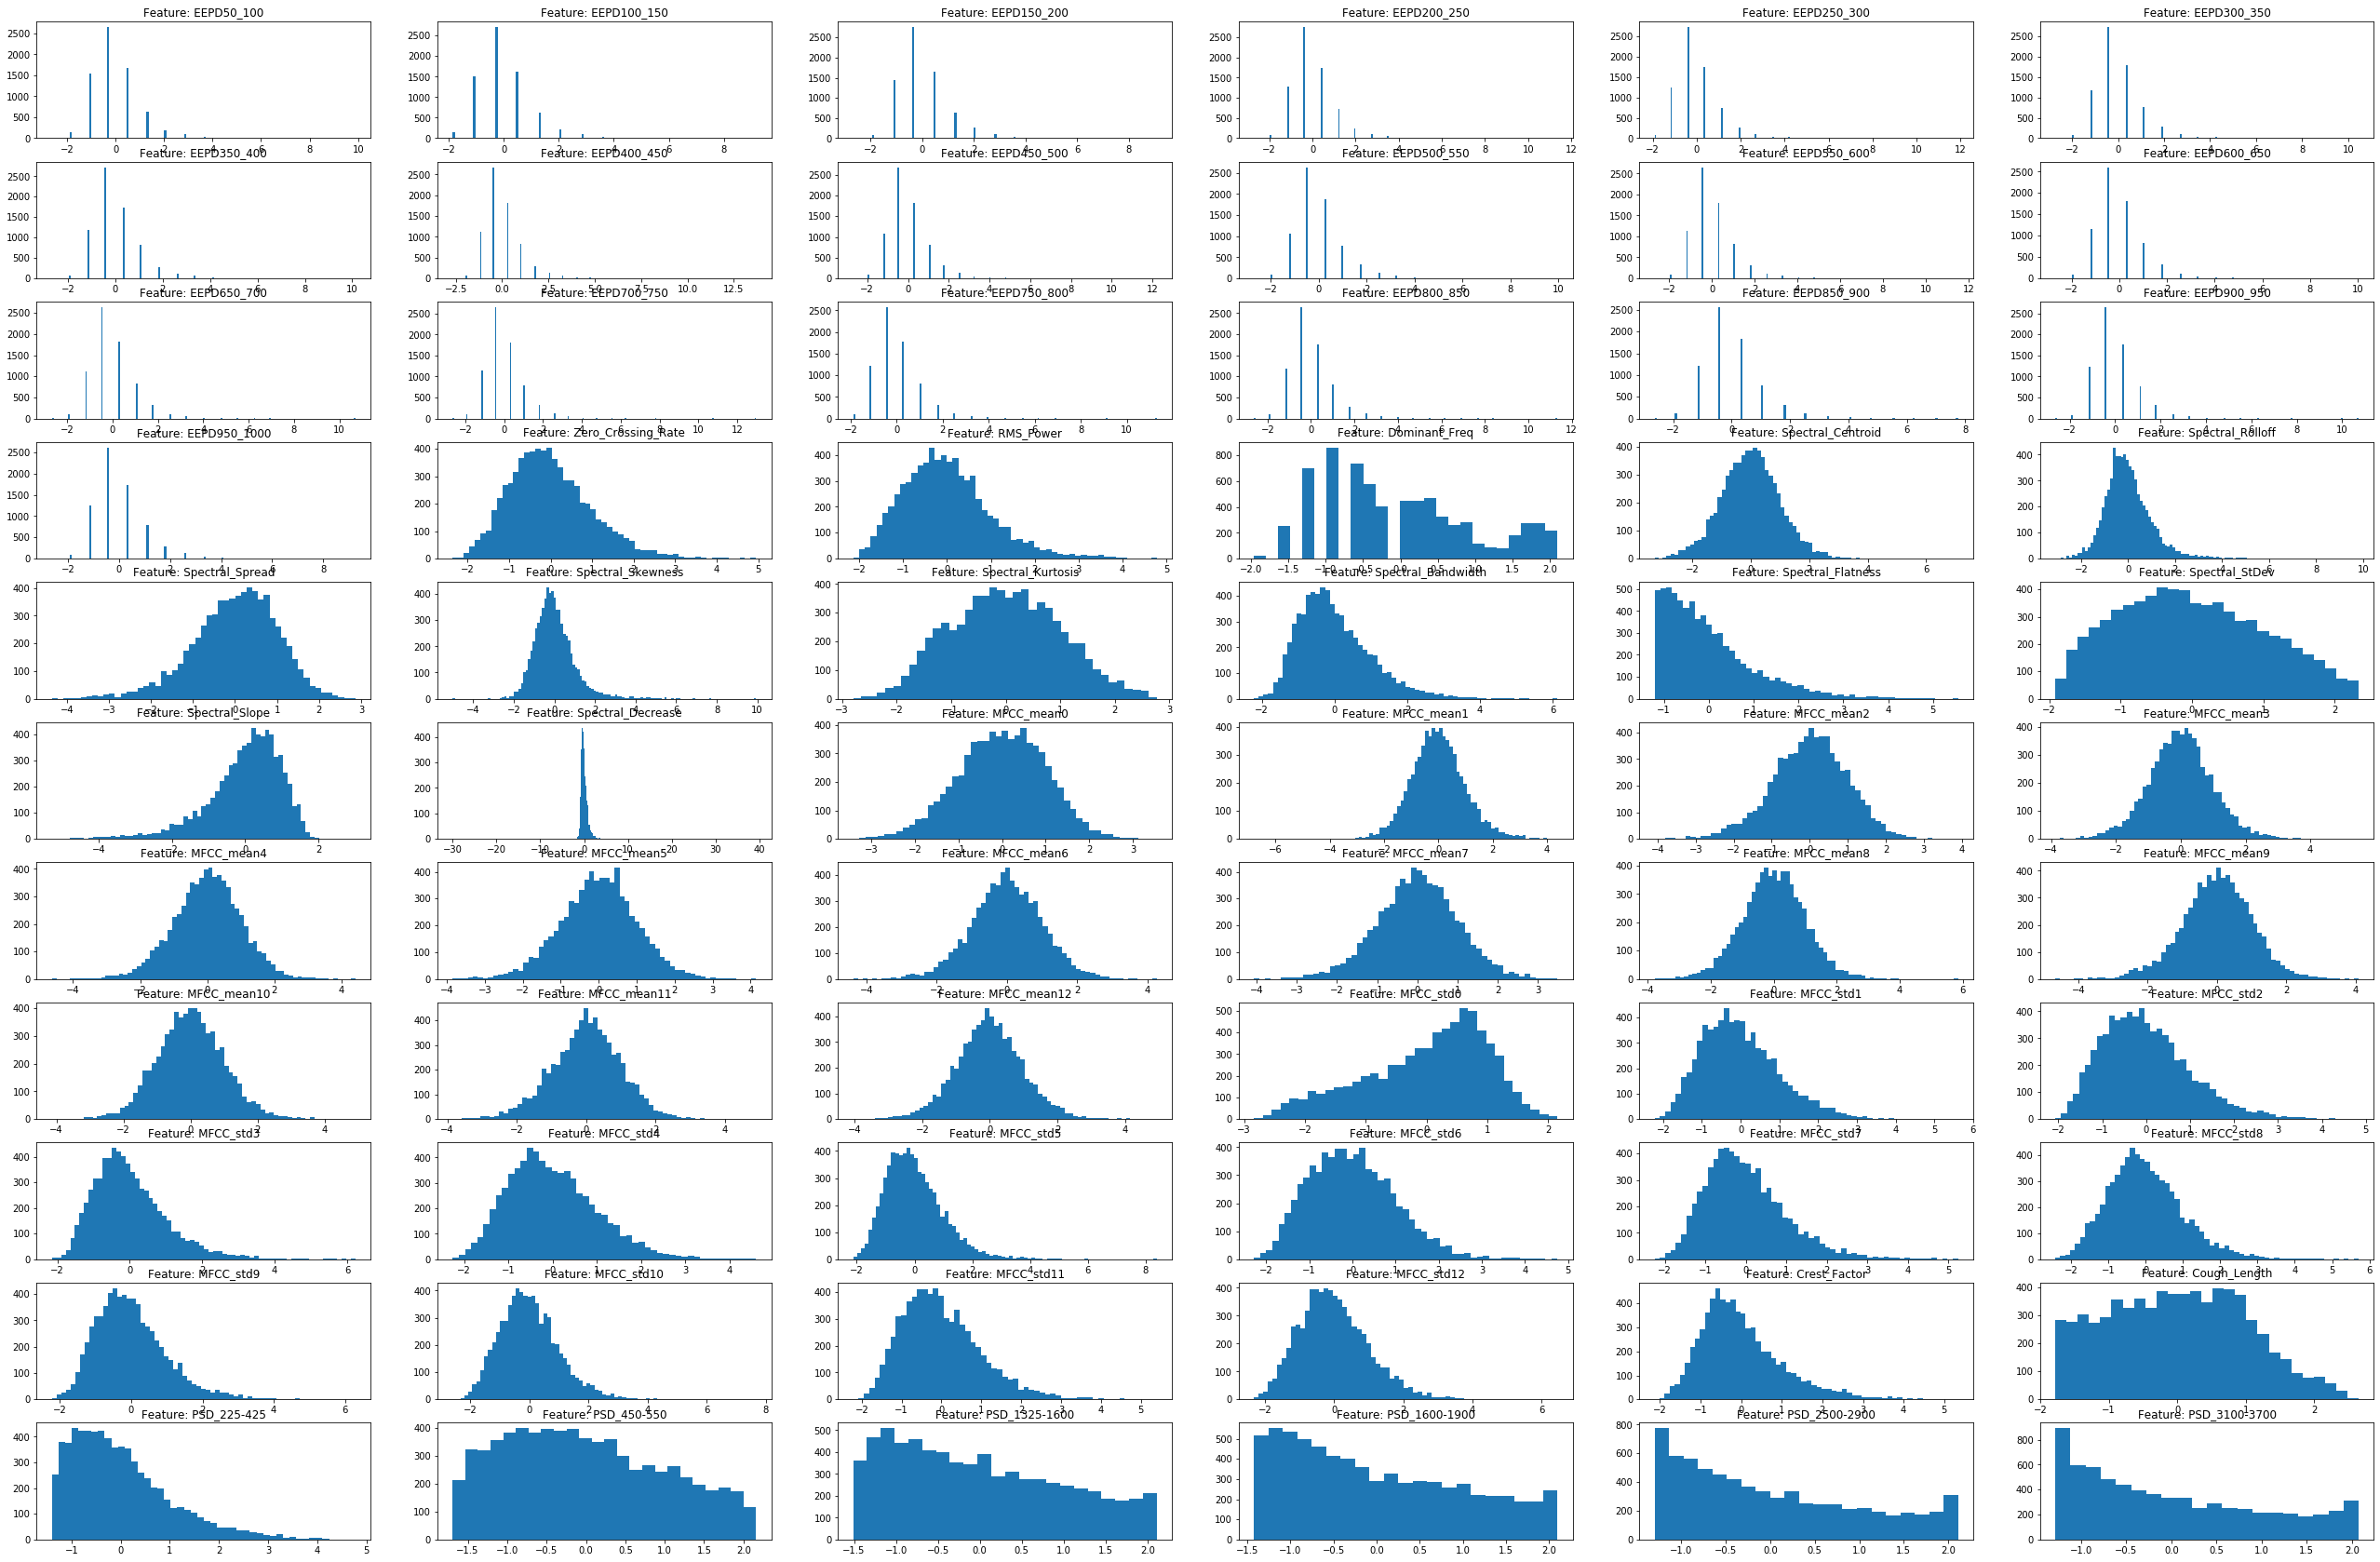

In [20]:
# Histogram tX
nrows = 11
ncols = 6
fig, axes = plt.subplots(nrows, ncols)

feature_names = df.drop("Label", axis=1).columns
feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp = df[feature_names[feature_id]]
        axes[row, col].hist(feature_tbp, bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_names[feature_id]))
        feature_id += 1

fig.set_size_inches(45, 30)

### Feature Correlation

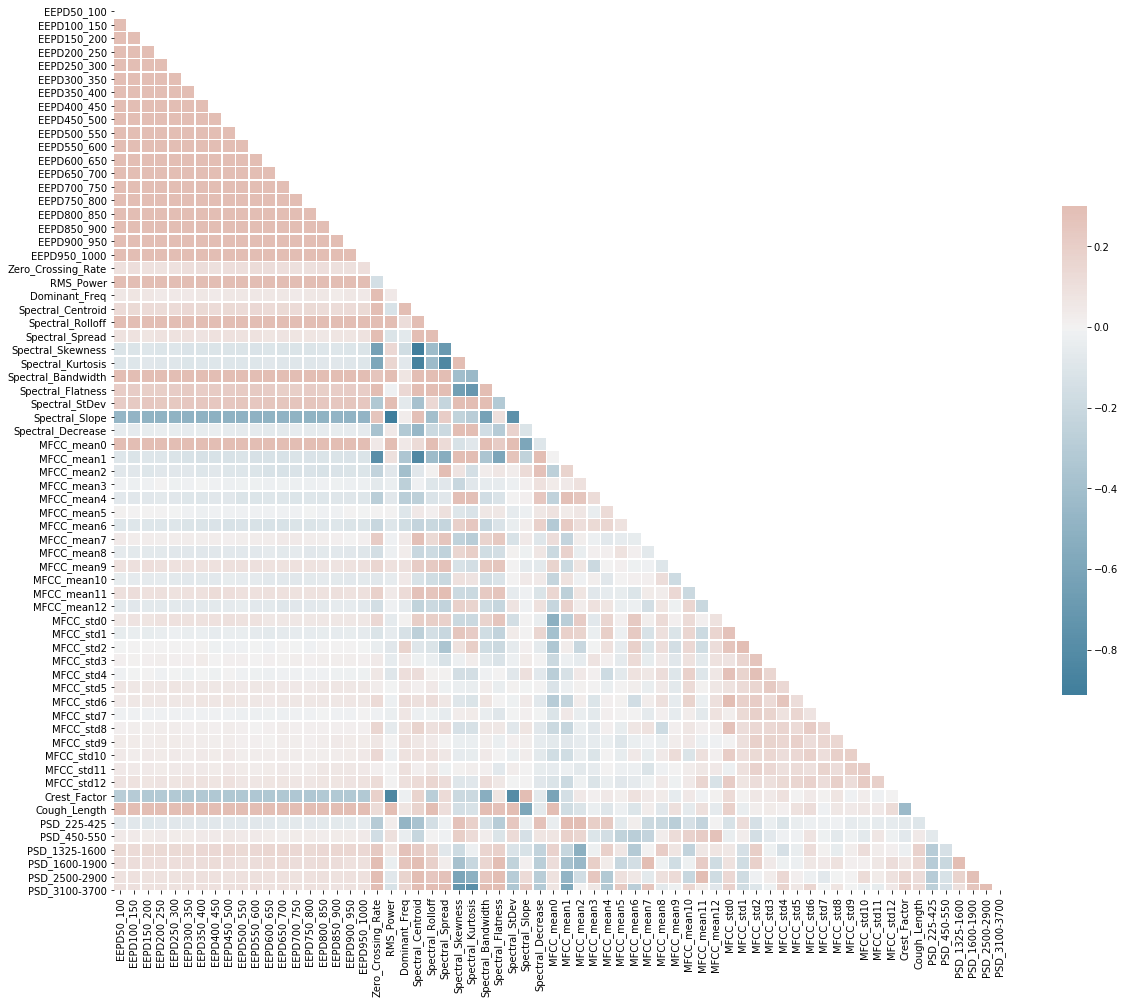

In [21]:
# Compute the correlation matrix
corr = df.drop('Label', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Class Balance 

In [10]:
df.shape

(7009, 67)

In [11]:
## number of wet coughs
sum(df['Label'])

1901

In [12]:
# Number of dry coughs
df.shape[0] - sum(df['Label'])

5108

In [13]:
## Class imbalance
(df['Label'].shape[0] - sum(df['Label']))/sum(df['Label'])

2.6870068385060493

2.7x as many dry as wet coughs. Class imbalance may be degrading the model. The imbalance is worsened when split into training and testing

### Random oversampling

Only done on test set in order to improve the model and avoid influencing the testing procedure. Oversampling risks overfitting, but it's not an immediate concern as we are currently underfitting. If overfitting does end up being the result we can switch to underfitting.

In [4]:
X_train, X_test, y_train, y_test = ih.train_test_split_on_index(df.drop('Label',axis=1),
                                                               df['Label'])

In [1]:
## Install imbalanced-learn by uncommenting line below and running it. May have to re-install kernel
# pip install imbalanced-learn
# check version number
#import imblearn as imbl
print(imbl.__version__)

0.7.0


#### First strategy: Sample minority group until it matches majority group

WARNING: The function destroys the hierarchical indexing and anonymizes data 

In [5]:
X_over, y_over = imbl.over_sampling.RandomOverSampler(sampling_strategy='minority').fit_resample(X_train, y_train)

In [6]:
y_over.sum()

4125

In [7]:
y_over.shape[0] - y_over.sum()

4125

Wet/dry coughs have now been balanced

Second Strategy: first failed.......... try undersampling?

In [17]:
from sklearn.linear_model import LogisticRegression
logit_Obal = LogisticRegression(max_iter = 1000).fit(X_over, y_over)
logit_Obal.score(X_over, y_over)

0.5452121212121213

In [18]:
logit_Obal.score(X_test, y_test)

0.5789473684210527

In [19]:
## Naive model
logit = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
logit.score(X_over, y_over)

0.5029090909090909

In [20]:
logit.score(X_test, y_test)

0.7094448449891853

## PLOT

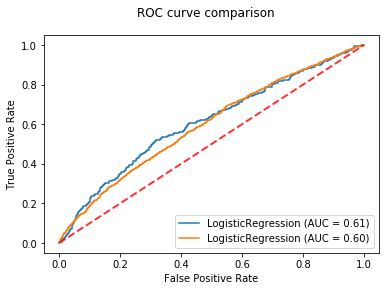

In [24]:
from sklearn.metrics import plot_roc_curve
svc_naive = plot_roc_curve(logit, X_test, y_test)
svc_Obal = plot_roc_curve(logit, X_over, y_over, ax=svc_naive.ax_)
svc_naive.ax_.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
svc_naive.figure_.suptitle("ROC curve comparison")

plt.show()

### Dimensionality Reduction

In [ ]:
## TSNE
from sklearn.manifold import TSNE

m = TSNE(learning_rate=500)
tsne_features = m.fit_transform(df_normalized)

df_normalized["x"] = tsne_features[:,0]
df_normalized["y"] = tsne_features[:,1]

g = sns.scatterplot(x='x', y='y', hue='Label', data=df_normalized)

In [ ]:
## Extra trees classifier - NOT ROBUST FOR HIGH NUMBER OF FEATURES
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

f, ax = plt.subplots(figsize=(18,5))
#plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_columns = X_train.columns[:19]
numerical_columns = X_train.columns[19:]

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

#preprocessing = ColumnTransformer(
#    [('cat', categorical_pipe, categorical_columns),
#     ('num', numerical_pipe, numerical_columns)])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns)])

#rf = Pipeline([
#    ('preprocess', preprocessing),
#    ('classifier', RandomForestClassifier(random_state=42))
#])

rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(18,20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [ ]:
#meaningful_features = ['MFCC_mean8', 'PDF_225-425', 'MFCC_mean4', 'MFCC_std1', 'MFCC_mean5', 'Spectral_Flatness']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split_on_index(features = df_normalized.drop("Label", axis=1), 
                                                             label = df_normalized["Label"])
categorical_columns = X_train.columns[:19]
numerical_columns = X_train.columns[19:]

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

#preprocessing = ColumnTransformer(
#    [('cat', categorical_pipe, categorical_columns),
#     ('num', numerical_pipe, numerical_columns)])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns)])

#rf = Pipeline([
#    ('preprocess', preprocessing),
#    ('classifier', RandomForestClassifier(random_state=42))
#])

rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(18,20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

In [ ]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 20))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)

ax1.set_yticklabels(df.columns[1:][tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[1:][tree_importance_sorted_idx])
fig.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(df.drop('Label',axis=1)).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=df.columns[1:].tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots( figsize=(20, 18))
c = ax1.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax1.set_xticks(dendro_idx)
ax1.set_yticks(dendro_idx)
ax1.set_xticklabels(dendro['ivl'], rotation='vertical')
ax1.set_yticklabels(dendro['ivl'])
plt.colorbar(c) 
fig.tight_layout()
plt.show()